# Bar Plots

## Two axes combined

In [1]:
# Install and load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [2]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsCombineTwoAxes.dta?raw=true")

data2 = data[data.food_group.isin(['animal', 'fruit', 'grain', 'veg', 'starch', 'processed_sugar'])]
data2


,int1mo,food_group,consumed,number_group,total_exp
12,1,animal,0.295367,2.362934,656.340154
13,2,animal,0.211058,1.688462,465.187635
14,3,animal,0.200307,1.602459,359.065346
15,4,animal,0.199405,1.595238,192.150500
16,5,animal,0.245122,1.960976,377.907981
...,...,...,...,...,...
139,8,veg,0.309461,1.383731,78.323235
140,9,veg,0.299935,1.372804,134.165000
141,10,veg,0.303889,1.404087,125.811346
142,11,veg,0.351746,1.547937,173.637500


[]

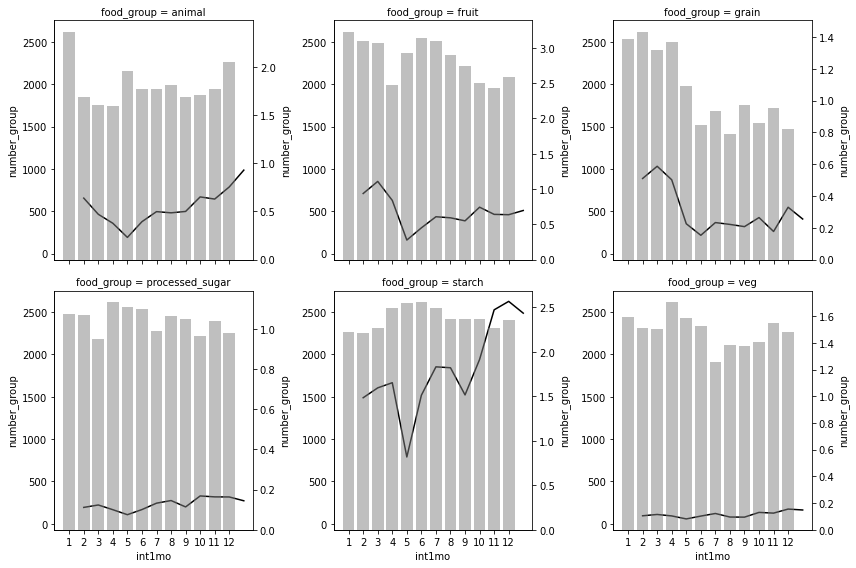

In [3]:
# Plot

def twin_barplot(x,y,color, alpha, **kwargs):
    ax = plt.twinx()
    sns.barplot(x=x,y=y,color=color,alpha = alpha, **kwargs, ax=ax)


g2 = sns.FacetGrid(data2, col = "food_group", height=4, col_wrap=3)

g2.map(sns.lineplot, "int1mo", "total_exp", color = 'black')

g2.map(twin_barplot, "int1mo", "number_group", color = 'grey', alpha = 0.5)

plt.plot()


## Multiple variables

In [4]:
#Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsMultipleVariables.dta?raw=true")
data


,hh_id,round,w_Main_Paddy_Prod,w_Upland_Paddy_Prod,w_Spring_Winter_Maize_Prod,w_Summer_Maize_Prod,w_Wheat_Prod,w_Spring_Winter_Potato_Prod,w_Summer_Potato_Prod,w_Millet_Prod,...,ml_w_Beans_Prod,bl_w_Soybeans_Prod,ml_w_Soybeans_Prod,bl_w_Lentil_Prod,ml_w_Lentil_Prod,bl_w_Black_Gram_Prod,ml_w_Black_Gram_Prod,bl_w_Pea_Prod,ml_w_Pea_Prod,treatment_group
0,520209,2.0,379.293945,NaN,NaN,96.682770,53.299477,297.485443,NaN,44.622818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,520211,1.0,33.076530,NaN,NaN,130.238831,50.303890,150.911667,NaN,24.807398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,520224,1.0,64.793953,NaN,28.797314,71.993286,14.398657,100.790596,NaN,86.391937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,520224,2.0,41.327240,NaN,NaN,82.654480,18.597258,235.565277,NaN,24.796345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,520226,2.0,67.766357,NaN,NaN,77.447266,36.787453,50.340721,NaN,NaN,...,3.872363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,754124,1.0,NaN,NaN,NaN,66.498230,47.287632,NaN,NaN,NaN,...,NaN,2.068834,NaN,NaN,NaN,2.364382,NaN,NaN,NaN,0.0
2709,754128,1.0,NaN,NaN,NaN,NaN,7.013659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2710,754134,1.0,NaN,74.20826,NaN,86.576302,115.022797,NaN,NaN,NaN,...,NaN,NaN,NaN,1.113124,NaN,0.989443,NaN,NaN,NaN,0.0
2711,754135,2.0,177.508423,NaN,NaN,22.188553,82.097649,17.750843,NaN,NaN,...,NaN,NaN,5.547138,NaN,1.109428,NaN,13.091247,NaN,6.212795,0.0


In [5]:
# Collapse the dataset across each treatment group

data2= (data
       .groupby(['treatment_group'])
       .agg({'treatment_group':'mean', 
             'bl_w_Main_Paddy_Prod':'mean','ml_w_Main_Paddy_Prod':'mean', 
             'bl_w_Spring_Winter_Potato_Prod':'mean', 'ml_w_Spring_Winter_Potato_Prod':'mean',
             'bl_w_Summer_Maize_Prod':'mean', 'ml_w_Summer_Maize_Prod':'mean',
            }))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['treatment_group'])

cond = data3['variable'].str.contains('bl', case = False)
data3['name']= np.where(cond, 'bl', 'ml')

def change (q):
    variable = str(q['variable'])
    if variable == 'ml_w_Main_Paddy_Prod' or 'bl_w_Main_Paddy_Prod':
        if 'Main' in variable:
            return ('Main_Paddy_Prod')
        elif 'Potato' in variable:
            return ('Spring_Winter_Potato_Prod')
        elif 'Maize' in variable:
            return ('Summer_Maize_Prod')
    else:
        pass
data3["variable"] = data3.apply(change, axis=1)

data3['name.group'] = data3.name.astype(str).str.cat(data3[['treatment_group']].astype(str), sep = '.')
data3


,treatment_group,variable,value,name,name.group
0,0.0,Main_Paddy_Prod,98.144730,bl,bl.0.0
1,1.0,Main_Paddy_Prod,119.025169,bl,bl.1.0
2,0.0,Main_Paddy_Prod,127.181786,ml,ml.0.0
3,1.0,Main_Paddy_Prod,139.099319,ml,ml.1.0
4,0.0,Spring_Winter_Potato_Prod,46.781124,bl,bl.0.0
5,1.0,Spring_Winter_Potato_Prod,69.619080,bl,bl.1.0
6,0.0,Spring_Winter_Potato_Prod,80.121582,ml,ml.0.0
7,1.0,Spring_Winter_Potato_Prod,75.556488,ml,ml.1.0
8,0.0,Summer_Maize_Prod,62.291615,bl,bl.0.0
9,1.0,Summer_Maize_Prod,57.494331,bl,bl.1.0


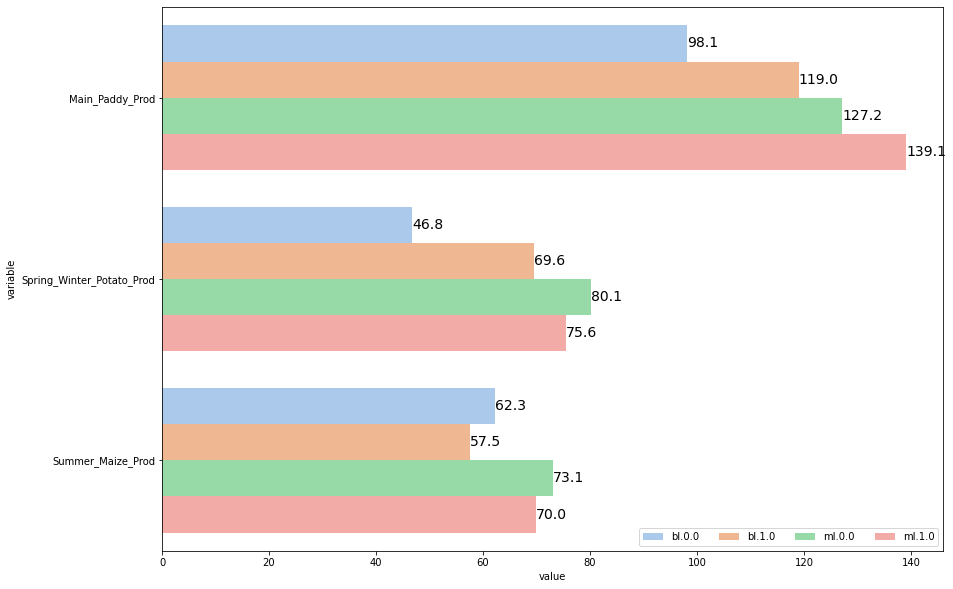

In [6]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data3, x = 'value', y = 'variable', hue = 'name.group', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 14)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 14)

plt.legend(loc="lower right", ncol = len(ax.lines))
plt.show()


## Two variables

In [7]:
# Load an example dataset 

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/BarPlotsTwoVariables.dta?raw=true")
data


,study,case,type,treat_correct
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638
4,Bihar,Diarrhea (ORS),Vignette,0.785000
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000


In [8]:
# Construct an interaction 

data['sc'] = data.study.astype(str).str.cat(data[['case']].astype(str), sep = '.')
data


,study,case,type,treat_correct,sc
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097,China.Tuberculosis (AFB or CXR)
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045,China.Tuberculosis (AFB or CXR)
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435,Delhi.Tuberculosis (AFB or CXR)
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638,Delhi.Tuberculosis (AFB or CXR)
4,Bihar,Diarrhea (ORS),Vignette,0.785000,Bihar.Diarrhea (ORS)
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000,Bihar.Diarrhea (ORS)


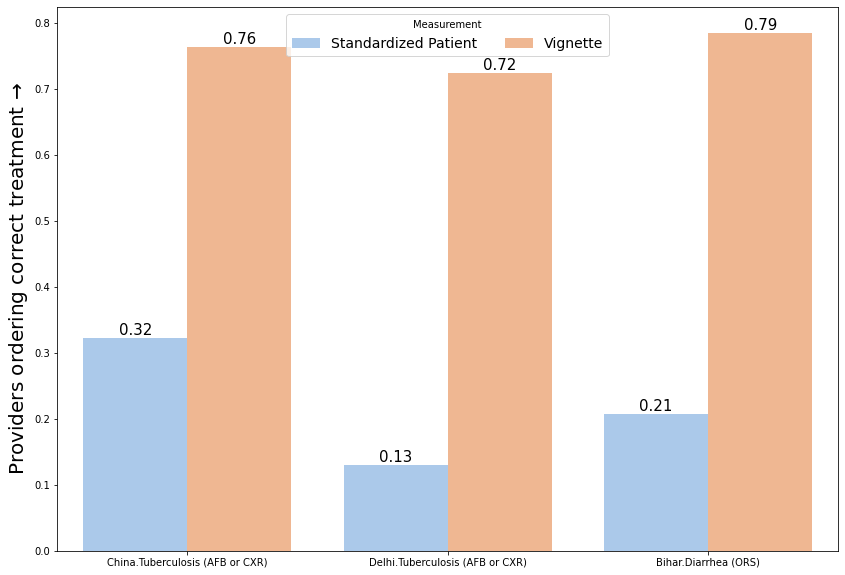

In [9]:
# Plot 

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data, x = 'sc', y = 'treat_correct', hue = 'type', palette = 'pastel')

plt.ylabel('Providers ordering correct treatment $→$', fontsize=20)
plt.xlabel('', fontsize=20)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 15)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 15)

plt.legend(title = 'Measurement', loc="upper center", ncol = len(ax.lines), fontsize=14)
plt.show()


## Horizontal multiple variables

In [10]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarMultipleVars.dta?raw=true")
data


,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Kenya,9061301,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,130.0,Public,0.000,31,19.377163,130/80,130,Male
162,Kenya,9041301,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,0.0,Public,0.100,31,19.377163,130/80,130,Male
163,Kenya,9041302,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,200.0,Public,0.000,31,19.377163,130/80,130,Male
164,Kenya,9022302,Chest Pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1000.0,Private,0.100,31,19.377163,130/80,130,Male


In [11]:
# Collapse the dataset across each treatment group

data['refer'] = data['refer'].map({'No': 0, 'Yes': 1})
data[["refer"]] = data[["refer"]].apply(pd.to_numeric)
data['med_class_any_16'] = data['med_class_any_16'].map({'No': 0, 'Steroids': 1})
data[["med_class_any_16"]] = data[["med_class_any_16"]].apply(pd.to_numeric)
data['med_class_any_6'] = data['med_class_any_6'].map({'No': 0, 'Antibiotics': 1})
data[["med_class_any_6"]] = data[["med_class_any_6"]].apply(pd.to_numeric)
data[["med_any"]] = data[["med_any"]].apply(pd.to_numeric)

data2= (data
       .groupby(['facility_type'])
       .agg({'facility_type':'first','as_correct':'mean','ch_correct': 'mean','cp_correct' : 'mean',
             'tb_correct': 'mean', 'med_any': 'mean',
            'checklist': 'mean', 'refer': 'mean', 
            'med_any':'mean', 'med_class_any_6': 'mean',
            'med_class_any_16': 'mean'}))

data2_reset=data2.reset_index(drop=True)


# Reshape data
data3 = pd.melt(data2_reset, id_vars=['facility_type'], value_vars=['as_correct', 'ch_correct', 'cp_correct', 'tb_correct','med_any','checklist','refer','med_class_any_6','med_class_any_16'])

data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["Asthma: Inhaler/Bronchodilator",
                                                           "Child Diarrhoea: ORS",
                                                             "Checklist",
                                                           "Chest Pain: Referral/Aspirin/ECG",
                                                             "Any medication",
                                                             "Steroids",
                                                             "Antibiotics",
                                                             "Referred (non-diarrhea)",
                                                           "Tuberculosis: AFB Smear"])
data3


,facility_type,variable,value
0,Public,Asthma: Inhaler/Bronchodilator,0.785714
1,Private For-Profit,Asthma: Inhaler/Bronchodilator,0.833333
2,Private FBO/SFO,Asthma: Inhaler/Bronchodilator,0.800000
3,Public,Child Diarrhoea: ORS,0.615385
4,Private For-Profit,Child Diarrhoea: ORS,0.777778
5,Private FBO/SFO,Child Diarrhoea: ORS,0.777778
6,Public,Chest Pain: Referral/Aspirin/ECG,0.142857
7,Private For-Profit,Chest Pain: Referral/Aspirin/ECG,0.111111
8,Private FBO/SFO,Chest Pain: Referral/Aspirin/ECG,0.000000
9,Public,Tuberculosis: AFB Smear,0.785714


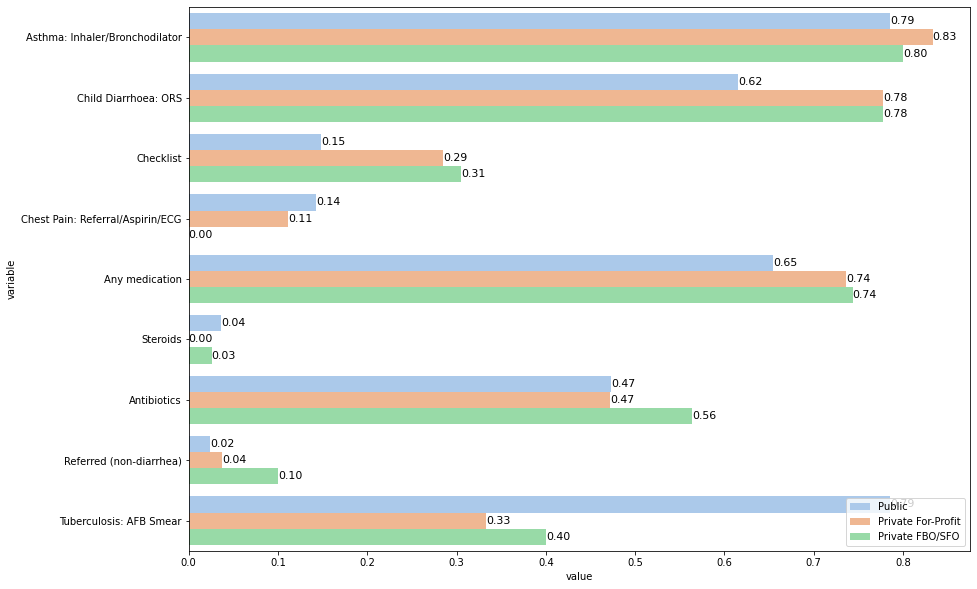

In [12]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data3, x = 'value', y = 'variable', hue = 'facility_type', palette ='pastel')

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11)

plt.legend(loc="lower right")
plt.show()


## Decreasing order

In [13]:
# Load example datasets 

data = wb.data.DataFrame('NY.GDP.PCAP.KD', time = 2018)
country_code = wb.economy.DataFrame()

data2 = pd.concat([data, country_code], axis=1)
data2

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,30536.667193,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFE,1544.077975,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,546.743010,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AFW,1843.554695,Africa Western and Central,True,NaN,NaN,,,,,
AGO,2717.474121,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...,...
XKX,4009.106423,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,1290.906786,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,6199.891699,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
ZMB,1368.601756,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LIC,Lusaka


In [14]:
data3 = data2[data2['aggregate'] == False]

data4 = data3.nsmallest(30, 'NY.GDP.PCAP.KD', keep = 'all')
data4

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
BDI,281.934732,Burundi,False,29.36390,-3.378400,SSF,SSA,IDX,LIC,Bujumbura
MWI,390.840707,Malawi,False,33.77030,-13.989900,SSF,SSA,IDX,LIC,Lilongwe
CAF,412.990203,Central African Republic,False,21.64070,5.630560,SSF,SSA,IDX,LIC,Bangui
SOM,425.416599,Somalia,False,45.32540,2.075150,SSF,SSA,IDX,LIC,Mogadishu
MDG,480.915251,Madagascar,False,45.71670,-20.466700,SSF,SSA,IDX,LIC,Antananarivo
COD,506.958274,"Congo, Dem. Rep.",False,15.32220,-4.325000,SSF,SSA,IDX,LIC,Kinshasa
NER,513.626786,Niger,False,2.10730,13.514000,SSF,SSA,IDX,LIC,Niamey
AFG,546.743010,Afghanistan,False,69.17610,34.522800,SAS,SAS,IDX,LIC,Kabul
MOZ,602.530495,Mozambique,False,32.57130,-25.966400,SSF,SSA,IDX,LIC,Maputo
TGO,612.785751,Togo,False,1.22550,6.122800,SSF,SSA,IDX,LIC,Lome


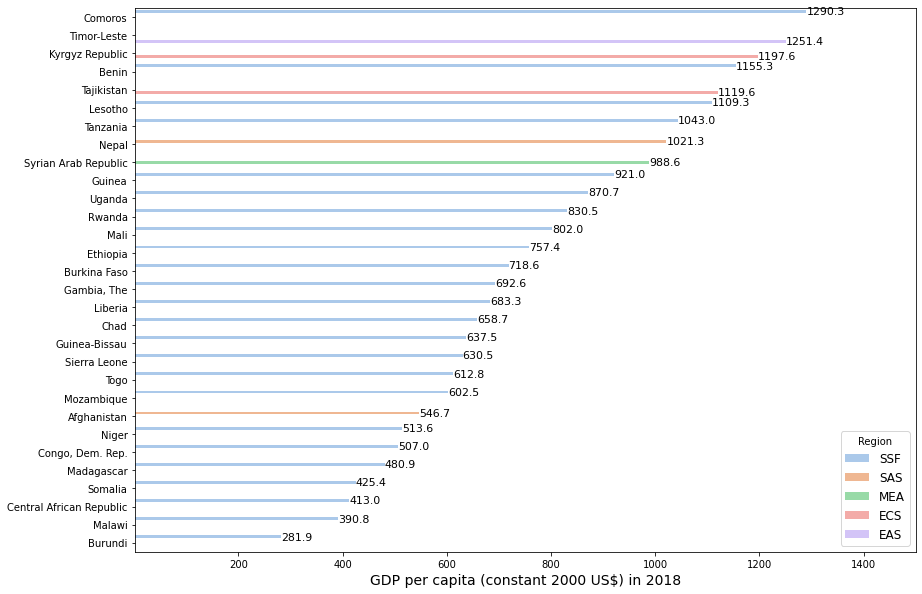

In [15]:
#Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data4, x = 'NY.GDP.PCAP.KD', y = 'name', hue = 'region', 
                 order=data4.sort_values('NY.GDP.PCAP.KD',ascending = False).name,
                palette='pastel')
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[4], fmt='%.1f', fontsize = 11)

ax.set_xlim(1,1500)

plt.ylabel('')
plt.xlabel('GDP per capita (constant 2000 US$) in 2018', fontsize = 14)
plt.legend(title = 'Region', loc = "lower right", fontsize=12)
plt.show()

## Horizontal bar plot

In [16]:
#  Load example dataset

data1 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot1.dta?raw=true")
data2 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBarPlot2.dta?raw=true")

data = pd.concat([data2, data1], axis=0)
data


,facilitycode,tottime,study,id,location_type,hours
0,BI_3503001,41.0,"Birbhum, India",NaN,NaN,NaN
1,BI_3503002,18.0,"Birbhum, India",NaN,NaN,NaN
2,BI_3503004,55.0,"Birbhum, India",NaN,NaN,NaN
3,BI_3503005,16.0,"Birbhum, India",NaN,NaN,NaN
4,BI_3503006,52.0,"Birbhum, India",NaN,NaN,NaN
...,...,...,...,...,...,...
380,V381,22.0,Vietnam Commune,381.0,1.0,0.366667
381,V382,238.0,Vietnam District,382.0,2.0,3.966667
382,V383,165.0,Vietnam District,383.0,2.0,2.750000
383,V384,199.0,Vietnam Commune,384.0,1.0,3.316667


In [17]:
# Collapse data

data4= (data1
       .groupby(['study'])
       .agg({'study':'first','hours':'mean'}))

data4

,study,hours
study,,
Vietnam Commune,Vietnam Commune,1.101324
Vietnam District,Vietnam District,2.831676


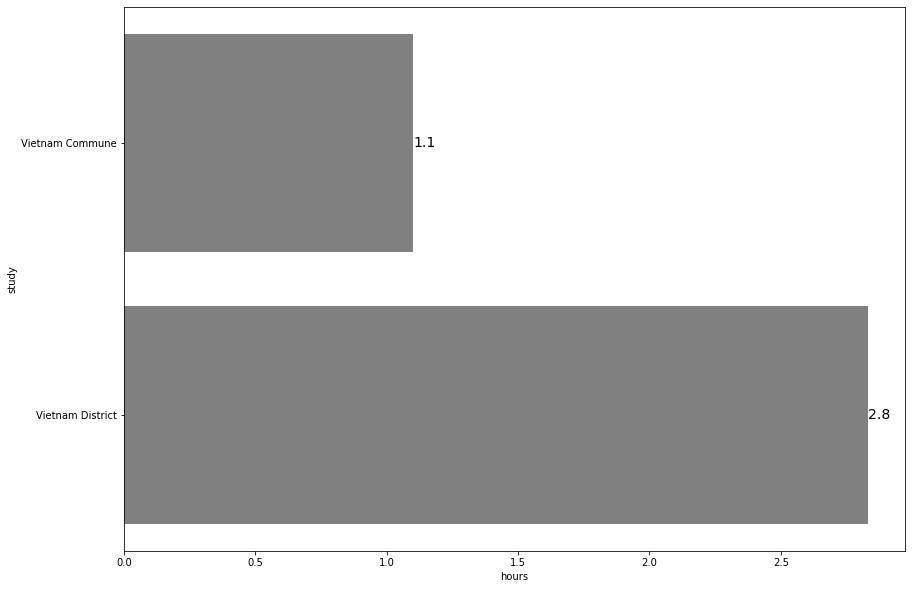

In [18]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'hours', y = 'study', color = 'grey')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)

plt.show()

## Horizontal decreasing order

In [19]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalBetterbar.dta?raw=true")
data


,sp_case,duration,patients_waiting_in,s4_tr1,s4_tr11,s5_referral,sp_id,pro_age,pro_male,sp1_e1,...,n_labs,cxr,sputum,dstgx,correct,q_mbbs,total_price,essential,sp_drugs_antibio_unlab,price_total_usd
0,SP1,6.850000,0,No,Yes,No,4,47,Male,No,...,3,1,0,0,1,1,451.000000,0.500000,1,7.2160
1,SP4,12.800000,0,No,Yes,No,15,47,Male,NaN,...,4,1,0,0,0,1,332.300018,0.416667,0,5.3168
2,SP1,6.316667,2,No,Yes,No,3,55,Male,No,...,0,0,0,0,0,1,146.000000,0.250000,1,2.3360
3,SP3,1.766667,0,No,Yes,No,13,55,Male,NaN,...,0,0,0,0,0,1,120.000000,0.000000,1,1.9200
4,SP1,5.150000,0,No,No,No,2,48,Male,No,...,0,0,0,0,0,1,60.000000,0.250000,1,0.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SP1,4.933333,1,No,No,No,4,33,Male,No,...,0,0,0,0,0,0,20.000000,0.500000,1,0.3200
246,SP2,0.966667,0,No,Yes,No,6,33,Male,NaN,...,0,0,0,0,0,0,20.000000,0.500000,0,0.3200
247,SP3,5.150000,1,No,No,Yes,13,33,Male,NaN,...,0,0,0,0,1,0,0.000000,0.250000,0,0.0000
248,SP1,8.666667,0,No,Yes,No,4,35,Male,No,...,1,0,0,0,0,0,20.000000,0.500000,1,0.3200


In [20]:
data['sp1_h1'] = data['sp1_h1'].map({'No': 0, 'Yes': 1})
data[["sp1_h1"]] = data[["sp1_h1"]].apply(pd.to_numeric)

data['sp1_h2'] = data['sp1_h2'].map({'No': 0, 'Yes': 1})
data[["sp1_h2"]] = data[["sp1_h2"]].apply(pd.to_numeric)

data['sp1_h3'] = data['sp1_h3'].map({'No': 0, 'Yes': 1})
data[["sp1_h3"]] = data[["sp1_h3"]].apply(pd.to_numeric)

data['sp1_h4'] = data['sp1_h4'].map({'No': 0, 'Yes': 1})
data[["sp1_h4"]] = data[["sp1_h4"]].apply(pd.to_numeric)

data['sp1_h5'] = data['sp1_h5'].map({'No': 0, 'Yes': 1})
data[["sp1_h5"]] = data[["sp1_h5"]].apply(pd.to_numeric)

data['sp1_h7'] = data['sp1_h7'].map({'No': 0, 'Yes': 1})
data[["sp1_h7"]] = data[["sp1_h7"]].apply(pd.to_numeric)

data['sp1_h8'] = data['sp1_h8'].map({'No': 0, 'Yes': 1})
data[["sp1_h8"]] = data[["sp1_h8"]].apply(pd.to_numeric)

data['sp1_h9'] = data['sp1_h9'].map({'No': 0, 'Yes': 1})
data[["sp1_h9"]] = data[["sp1_h9"]].apply(pd.to_numeric)

data['sp1_h10'] = data['sp1_h10'].map({'No': 0, 'Yes': 1})
data[["sp1_h10"]] = data[["sp1_h10"]].apply(pd.to_numeric)

data['sp1_h11'] = data['sp1_h11'].map({'No': 0, 'Yes': 1})
data[["sp1_h11"]] = data[["sp1_h11"]].apply(pd.to_numeric)

data['sp1_h12'] = data['sp1_h12'].map({'No': 0, 'Yes': 1})
data[["sp1_h12"]] = data[["sp1_h12"]].apply(pd.to_numeric)

data['sp1_h13'] = data['sp1_h13'].map({'No': 0, 'Yes': 1})
data[["sp1_h13"]] = data[["sp1_h13"]].apply(pd.to_numeric)

data['sp1_h14'] = data['sp1_h14'].map({'No': 0, 'Yes': 1})
data[["sp1_h14"]] = data[["sp1_h14"]].apply(pd.to_numeric)

data['sp1_h15'] = data['sp1_h15'].map({'No': 0, 'Yes': 1})
data[["sp1_h15"]] = data[["sp1_h15"]].apply(pd.to_numeric)

data['sp1_h16'] = data['sp1_h16'].map({'No': 0, 'Yes': 1})
data[["sp1_h16"]] = data[["sp1_h16"]].apply(pd.to_numeric)

data['sp1_h17'] = data['sp1_h17'].map({'No': 0, 'Yes': 1})
data[["sp1_h17"]] = data[["sp1_h17"]].apply(pd.to_numeric)

data['sp1_h18'] = data['sp1_h18'].map({'No': 0, 'Yes': 1})
data[["sp1_h18"]] = data[["sp1_h18"]].apply(pd.to_numeric)

data['sp1_h19'] = data['sp1_h19'].map({'No': 0, 'Yes': 1})
data[["sp1_h19"]] = data[["sp1_h19"]].apply(pd.to_numeric)

data['sp1_h20'] = data['sp1_h20'].map({'No': 0, 'Yes': 1})
data[["sp1_h20"]] = data[["sp1_h20"]].apply(pd.to_numeric)

data['sp1_h21'] = data['sp1_h21'].map({'No': 0, 'Yes': 1})
data[["sp1_h21"]] = data[["sp1_h21"]].apply(pd.to_numeric)

data['sp1_e1'] = data['sp1_e1'].map({'No': 0, 'Yes': 1})
data[["sp1_e1"]] = data[["sp1_e1"]].apply(pd.to_numeric)

data['sp1_e2'] = data['sp1_e2'].map({'No': 0, 'Yes': 1})
data[["sp1_e2"]] = data[["sp1_e2"]].apply(pd.to_numeric)

data['sp1_e3'] = data['sp1_e3'].map({'No': 0, 'Yes': 1})
data[["sp1_e3"]] = data[["sp1_e3"]].apply(pd.to_numeric)

data['sp1_e5'] = data['sp1_e5'].map({'No': 0, 'Yes': 1})
data[["sp1_e5"]] = data[["sp1_e5"]].apply(pd.to_numeric)

data['sp1_e6'] = data['sp1_e6'].map({'No': 0, 'Yes': 1})
data[["sp1_e6"]] = data[["sp1_e6"]].apply(pd.to_numeric)

In [21]:
# Select data

data2 = data[["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"]]


# Collapse data

data3= data2.agg(['mean'])


# Reshape data

data4 = pd.melt(data3, value_vars=["sp1_h1", "sp1_h2", "sp1_h3", "sp1_h4", "sp1_h5", "sp1_h7", "sp1_h8", 
              "sp1_h9", "sp1_h10", "sp1_h11", "sp1_h12", "sp1_h13", "sp1_h14", "sp1_h15",
              "sp1_h16", "sp1_h17", "sp1_h18", "sp1_h19", "sp1_h20", "sp1_h21", 
              "sp1_e1", "sp1_e2", "sp1_e3", "sp1_e5", "sp1_e6"])
data4


,variable,value
0,sp1_h1,0.933333
1,sp1_h2,0.453333
2,sp1_h3,0.013333
3,sp1_h4,0.026667
4,sp1_h5,0.080000
5,sp1_h7,0.586667
6,sp1_h8,0.293333
7,sp1_h9,0.040000
8,sp1_h10,0.120000
9,sp1_h11,0.146667


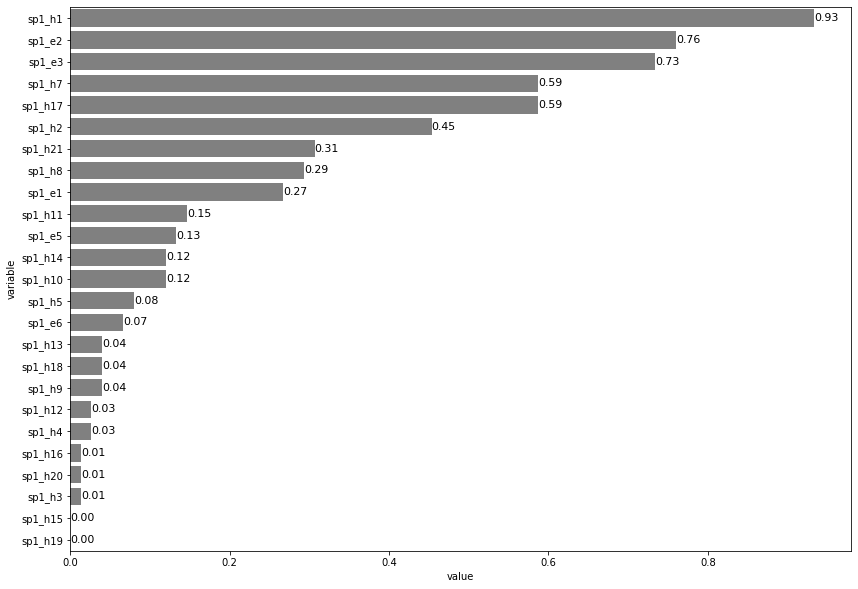

In [22]:
# Plot

plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'value', y = 'variable', color = 'grey',
                order=data4.sort_values('value',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

## Pre-defined error bars

In [23]:
# Load an example dataset

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/HorizontalGroupSE.dta?raw=true")
data

,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,correct_treatment,checklist_n,med_any,sp_code,city_patna,city_mumbai,city_delhi,id,case1,city
0,NaN,Case 2,1,Delhi,1,NaN,Yes,Referral,9050153,0.0,...,1,1,0,Rubi Kumari,1,0,1,1,1,Delhi
1,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050153,0.0,...,0,0,1,Sudhir Kumar,1,0,1,1,1,Delhi
2,NaN,Case 2,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,1,1,0,Rubi Kumari,1,0,1,2,1,Delhi
3,NaN,Case 1,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,0,0,1,Sudhir Kumar,1,0,1,2,1,Delhi
4,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050155,0.0,...,0,1,1,Sudhir Kumar,1,0,1,3,1,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,Mumbai,3,0.500000,No,No Referral,QC9PN1005,NaN,...,0,0,1,Dananjay Kumar,1,1,0,620,1,Mumbai
1196,NaN,Case 1,0,Mumbai,3,0.416667,No,No Referral,QC9PN1006,NaN,...,0,0,1,Dananjay Kumar,1,1,0,621,1,Mumbai
1197,NaN,Case 2,0,Mumbai,3,1.733333,No,No Referral,QC9PN1006,NaN,...,0,1,1,Tej Bahadur,1,1,1,621,1,Mumbai
1198,NaN,Case 2,0,Mumbai,3,1.550000,No,No Referral,QC9PN1007,NaN,...,0,1,1,Tej Bahadur,1,1,1,622,1,Mumbai


In [24]:
data['dr_3'] = data['dr_3'].map({'No Referral': 0, 'Referral': 1})
data[["dr_3"]] = data[["dr_3"]].apply(pd.to_numeric)
data['med_b2_any_antibiotic'] = data['med_b2_any_antibiotic'].map({'No Antibiotic': 0, 'Gave Antibiotic': 1})
data[["med_b2_any_antibiotic"]] = data[["med_b2_any_antibiotic"]].apply(pd.to_numeric)
data['med_b2_any_steroid'] = data['med_b2_any_steroid'].map({'No Steroid': 0, 'Gave Steroid': 1})
data[["med_b2_any_steroid"]] = data[["med_b2_any_steroid"]].apply(pd.to_numeric)
data['med_l_any_2'] = data['med_l_any_2'].map({'No': 0, 'Fluoroquinolone': 1})
data[["med_l_any_2"]] = data[["med_l_any_2"]].apply(pd.to_numeric)
data['med_l_any_1'] = data['med_l_any_1'].map({'No': 0})
data[["med_l_any_1"]] = data[["med_l_any_1"]].apply(pd.to_numeric)


In [25]:
# Reshape and collapse data for means

data2= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'mean', 
             "correct_treatment":'mean', "med_b2_any_antibiotic":'mean', 
             "med_b2_any_steroid":'mean', "med_b2_any_antister":'mean', 
              "med_l_any_2":'mean', "med_b2_any_schedule_h":'mean', 
             "med_b2_any_schedule_h1":'mean', "med_b2_any_schedule_x":'mean', 
             "med_l_any_1":'mean'}))

data2_2 = pd.melt(data2, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data2_2.rename(columns={'value': 'mean'}, inplace=True)


# Reshape and collapse data for error bars

data3= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'sem', 
             "correct_treatment":'sem', "med_b2_any_antibiotic":'sem', 
             "med_b2_any_steroid":'sem', "med_b2_any_antister":'sem', 
              "med_l_any_2":'sem', "med_b2_any_schedule_h":'sem', 
             "med_b2_any_schedule_h1":'sem', "med_b2_any_schedule_x":'sem', 
             "med_l_any_1":'sem'}))

data3_2 = pd.melt(data3, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data3_2.rename(columns={'value': 'sem', 'city': 'city2', 'variable': 'variable2'}, inplace=True)


# Concat datas

dataf = pd.concat([data2_2, data3_2], axis=1)
dataf


,city,variable,mean,city2,variable2,sem
0,Delhi,dr_3,0.576923,Delhi,dr_3,0.048680
1,Mumbai,dr_3,0.372483,Mumbai,dr_3,0.019820
2,Patna,dr_3,0.430000,Patna,dr_3,0.022163
3,Delhi,correct_treatment,0.509615,Delhi,correct_treatment,0.049257
4,Mumbai,correct_treatment,0.343960,Mumbai,correct_treatment,0.019474
5,Patna,correct_treatment,0.388000,Patna,correct_treatment,0.021814
6,Delhi,med_b2_any_antibiotic,0.298077,Delhi,med_b2_any_antibiotic,0.045070
7,Mumbai,med_b2_any_antibiotic,0.159396,Mumbai,med_b2_any_antibiotic,0.015006
8,Patna,med_b2_any_antibiotic,0.386000,Patna,med_b2_any_antibiotic,0.021794
9,Delhi,med_b2_any_steroid,0.105769,Delhi,med_b2_any_steroid,0.030303


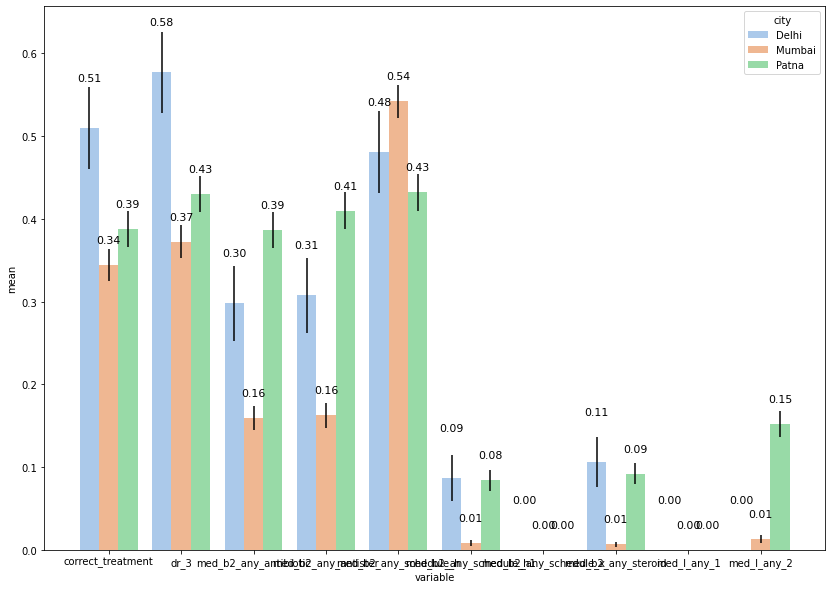

In [26]:
# Plot

dataf = dataf.sort_values(['city', 'variable'])
plt.figure(figsize=(14,10))

ax = sns.barplot(data=dataf, x = 'variable', y ='mean', hue ='city', palette = 'pastel')

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=dataf["sem"], fmt="none", c="k")

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11, padding=45)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11, padding=20)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11, padding=20)

plt.show()


## Stacked

In [27]:
# Load an example data set

data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/blob/main/data/StackBarGraphs.dta?raw=true")
data


,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,city_delhi,id,case1,n,checkgroup,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5
0,NaN,Case 2,1,DELHI,1,NaN,Yes,Referral,9050153,0.0,...,1,1,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes
1,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050153,0.0,...,1,1,1,1.0,"""Case 1"" ""(503/599)""",No,No,Yes,No,No
2,NaN,Case 2,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,1,2,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes
3,NaN,Case 1,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,1,2,1,1.0,"""Case 1"" ""(96/599)""",No,No,Yes,No,No
4,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050155,0.0,...,1,3,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,MUMBAI,3,0.500000,No,No Referral,QC9PN1005,NaN,...,0,620,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
1196,NaN,Case 1,0,MUMBAI,3,0.416667,No,No Referral,QC9PN1006,NaN,...,0,621,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
1197,NaN,Case 2,0,MUMBAI,3,1.733333,No,No Referral,QC9PN1006,NaN,...,1,621,1,1.0,"""Case 2"" ""(200/601)""",No,No,Yes,No,No
1198,NaN,Case 2,0,MUMBAI,3,1.550000,No,No Referral,QC9PN1007,NaN,...,1,622,1,1.0,"""Case 2"" ""(200/601)""",No,No,Yes,No,No


In [28]:
data['med_b2_antister_cat_1'] = data['med_b2_antister_cat_1'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_1"]] = data[["med_b2_antister_cat_1"]].apply(pd.to_numeric)

data['med_b2_antister_cat_2'] = data['med_b2_antister_cat_2'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_2"]] = data[["med_b2_antister_cat_2"]].apply(pd.to_numeric)

data['med_b2_antister_cat_3'] = data['med_b2_antister_cat_3'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_3"]] = data[["med_b2_antister_cat_3"]].apply(pd.to_numeric)

data['med_b2_antister_cat_4'] = data['med_b2_antister_cat_4'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_4"]] = data[["med_b2_antister_cat_4"]].apply(pd.to_numeric)

data['med_b2_antister_cat_5'] = data['med_b2_antister_cat_5'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_5"]] = data[["med_b2_antister_cat_5"]].apply(pd.to_numeric)


In [29]:
# Collapse data

data2= (data
       .groupby(['checkgroup'])
       .agg({'checkgroup': 'first','case':'first',
             'dr_3':'first', 'med_b2_antister_cat_1':'mean',
             'med_b2_antister_cat_2':'mean',
            'med_b2_antister_cat_3':'mean', 'med_b2_antister_cat_4':'mean', 
            'med_b2_antister_cat_5':'mean'}))

data2_reset=data2.reset_index(drop=True)


# Reshape data

data3 = pd.melt(data2_reset, id_vars=['checkgroup', 'dr_3', 'case'], value_vars=['dr_3','med_b2_antister_cat_1','med_b2_antister_cat_2', 
                                                                     'med_b2_antister_cat_3',
                                                                    'med_b2_antister_cat_4',
                                                                    'med_b2_antister_cat_5'])

data3["variable"] = data3["variable"].astype("category")
data3["variable"] = data3["variable"].cat.rename_categories(["No antibiotic or steroid",
                                                           "Steriod",
                                                           "Antibiotic",
                                                           "Antibiotic and steroid",
                                                           "No medication"])
data3


,checkgroup,dr_3,case,variable,value
0,"""Case 1"" ""(503/599)""",No Referral,Case 1,No antibiotic or steroid,0.526839
1,"""Case 1"" ""(96/599)""",Referral,Case 1,No antibiotic or steroid,0.125000
2,"""Case 2"" ""(200/601)""",No Referral,Case 2,No antibiotic or steroid,0.485000
3,"""Case 2"" ""(401/601)""",Referral,Case 2,No antibiotic or steroid,0.139651
4,"""Case 1"" ""(503/599)""",No Referral,Case 1,Steriod,0.017893
5,"""Case 1"" ""(96/599)""",Referral,Case 1,Steriod,0.000000
6,"""Case 2"" ""(200/601)""",No Referral,Case 2,Steriod,0.030000
7,"""Case 2"" ""(401/601)""",Referral,Case 2,Steriod,0.000000
8,"""Case 1"" ""(503/599)""",No Referral,Case 1,Antibiotic,0.341948
9,"""Case 1"" ""(96/599)""",Referral,Case 1,Antibiotic,0.135417


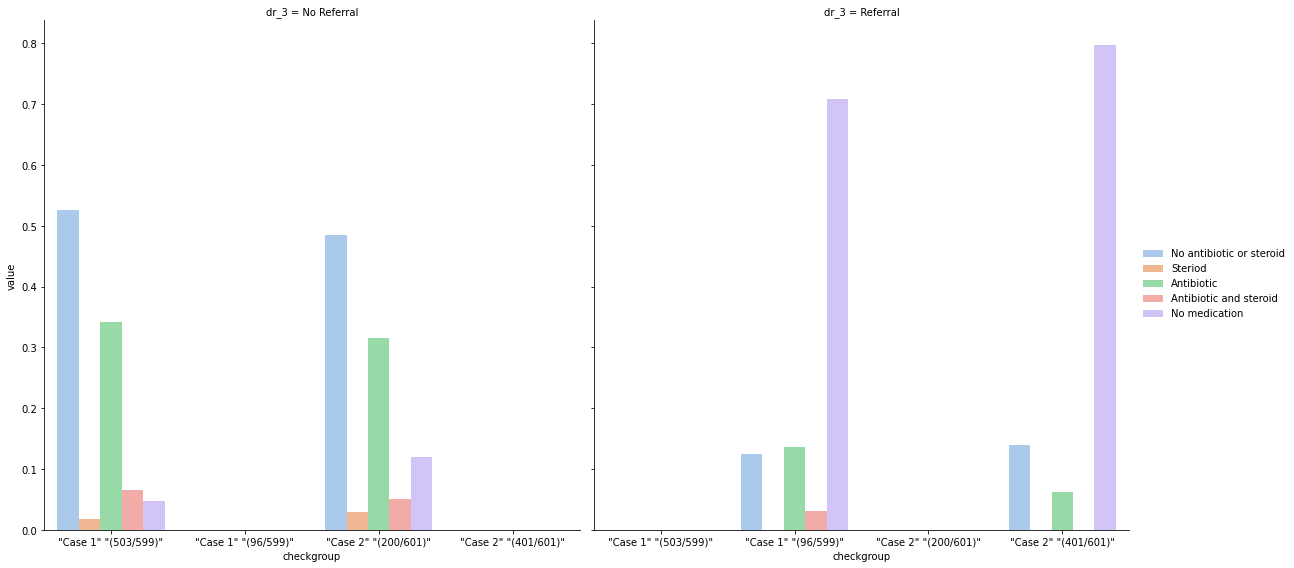

In [30]:
# Plot

g = sns.FacetGrid(data3, col = 'dr_3', height=8, sharex=False)
g = (g.map_dataframe(sns.barplot, x = 'checkgroup', y ='value', hue = 'variable', palette = 'pastel').add_legend())

plt.show()
